<h1>Exploratory Data Analysis (EDA)</h1>

**Import Libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from pprint import pprint
from tqdm import tqdm
tqdm.pandas()

In [20]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Dataset Loading**

In [21]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")
# Preview Dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Exploratory Data Analysis (EDA)**

In [22]:
# Check Null Values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [23]:
# Check unique values
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [24]:
# Remove duplicated rows
df = df.drop_duplicates()
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [25]:
# Chatwords from Github Repository: https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [26]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [27]:
# Basic preprocessing
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic chars
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = text.lower().translate(str.maketrans("", "", string.punctuation)) # Lowercase & remove punctuation
    text = chat_conversion(text) # Convert chatWords
    text = remove_emoji(text) # Remove Emoji
    return text

df["clean_review"] = df["review"].progress_apply(preprocess_text)
df["review_length"] = df["clean_review"].progress_apply(lambda x: len(x.split()))


100%|██████████| 49582/49582 [00:00<00:00, 126456.48it/s]


In [28]:
df[['review', 'clean_review','review_length']].head(10)

,review,clean_review,review_length
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,300
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,156
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend Te...,164
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...,128
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the Tears in my eyes of...,228
5,"Probably my all-time favorite movie, a story o...",probably my alltime favorite movie a story of ...,117
6,I sure would like to see a resurrection of a u...,i sure would like to see a resurrection of a u...,149
7,"This show was an amazing, fresh & innovative i...",this show was an amazing fresh innovative idea...,169
8,Encouraged by the positive comments about this...,encouraged by the positive comments about this...,123
9,If you like original gut wrenching laughter yo...,if you like original gut wrenching laughter yo...,31


In [29]:
def get_top_n_words(texts, n=20):
    all_words = " ".join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

print("Top words in positive reviews:")
pprint(get_top_n_words(df[df['sentiment'] == 'positive']['clean_review']))

print("\nTop words in negative reviews:")
pprint(get_top_n_words(df[df['sentiment'] == 'negative']['clean_review']))

Top words in positive reviews:
[('the', 331486),
 ('and', 173648),
 ('a', 161858),
 ('of', 150908),
 ('to', 130070),
 ('is', 111018),
 ('in', 108825),
 ('it', 75145),
 ('i', 68416),
 ('this', 66606),
 ('that', 66056),
 ('as', 50082),
 ('with', 45181),
 ('for', 43524),
 ('was', 42926),
 ('film', 39303),
 ('but', 39045),
 ('movie', 35860),
 ('his', 33435),
 ('on', 32807)]

Top words in negative reviews:
[('the', 314370),
 ('a', 155182),
 ('and', 143478),
 ('of', 135111),
 ('to', 134238),
 ('is', 97609),
 ('in', 96093),
 ('this', 77741),
 ('i', 75936),
 ('it', 75076),
 ('that', 68748),
 ('was', 51471),
 ('movie', 47055),
 ('for', 41985),
 ('with', 40723),
 ('but', 40682),
 ('as', 39318),
 ('film', 34686),
 ('on', 32994),
 ('not', 31291)]


In [30]:
# Word cloud for positive and negative reviews
positive_text = " ".join(df[df["sentiment"] == "positive"]["clean_review"])
negative_text = " ".join(df[df["sentiment"] == "negative"]["clean_review"])
positive_wc = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color="black", colormap="Pastel1").generate(negative_text)

C:\Users\User\AppData\Local\Temp\ipykernel_16928\3104586012.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, ax=axs[0, 0], palette=custom_palette)


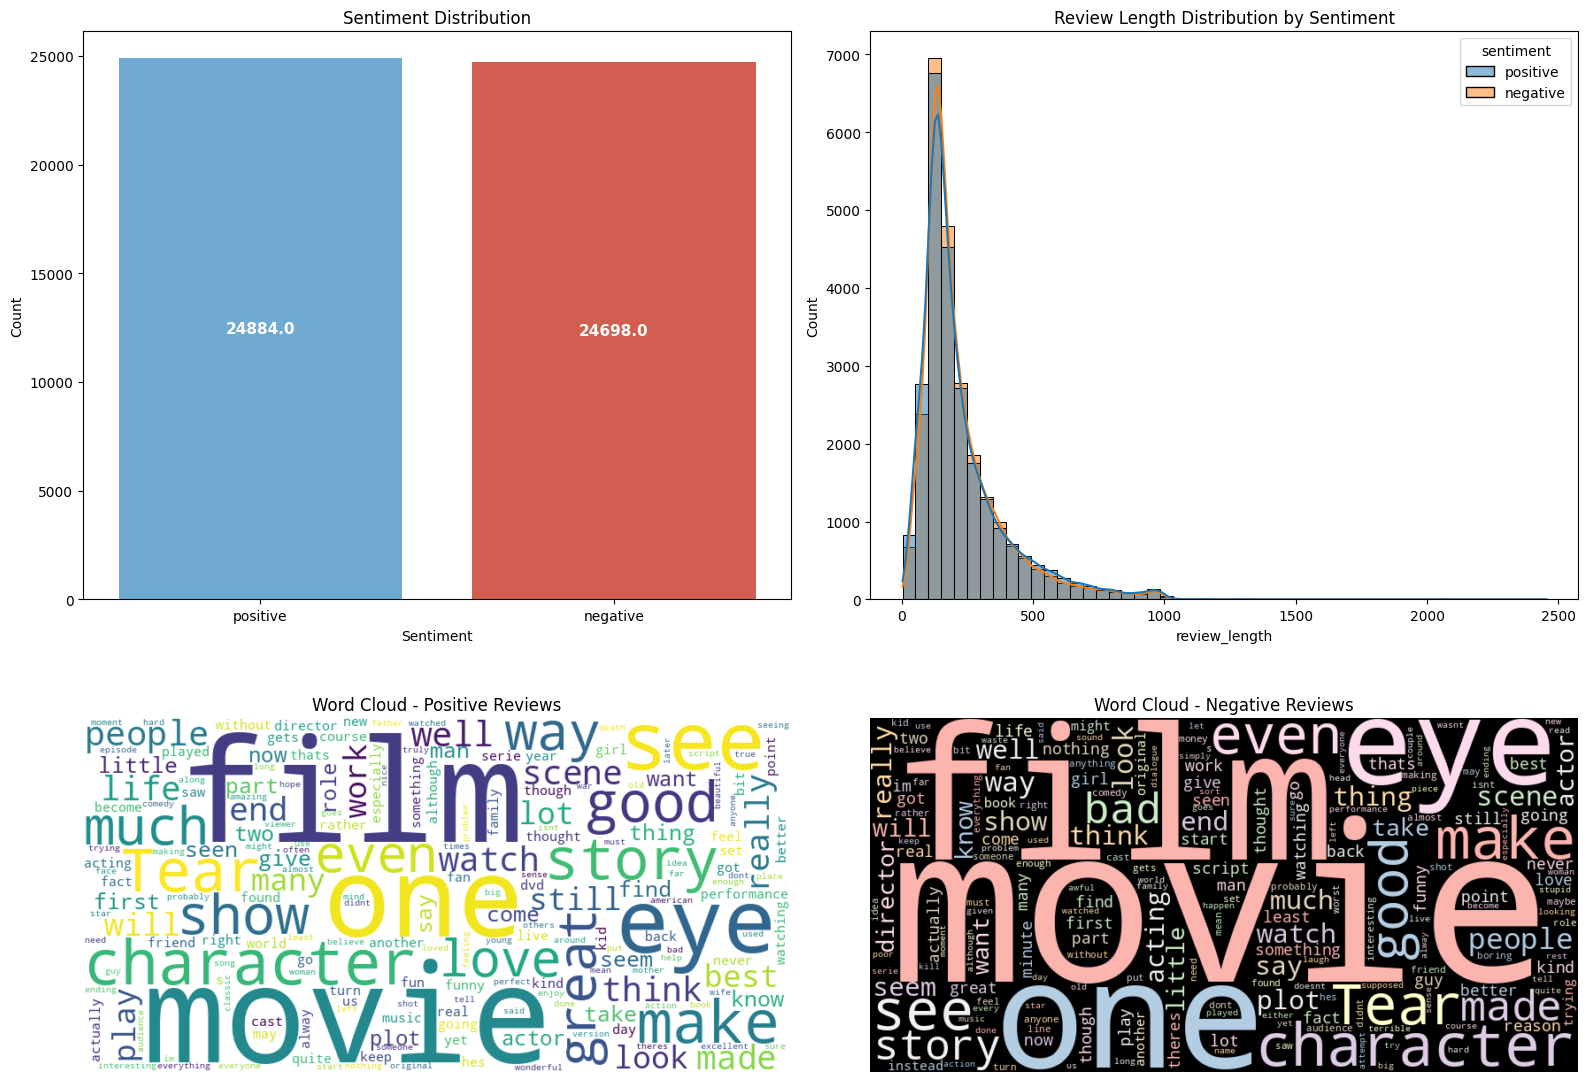

In [31]:
# Average review length by sentiment
avg_length = df.groupby("sentiment")["review_length"].mean().reset_index()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
# Custom bar colors
custom_palette = {"positive": "#5DADE2", "negative": "#E74C3C"}

# Bar Chart
sns.countplot(x="sentiment", data=df, ax=axs[0, 0], palette=custom_palette)
axs[0, 0].set_title("Sentiment Distribution")
axs[0, 0].set_xlabel("Sentiment")
axs[0, 0].set_ylabel("Count")
# Add labels inside the bars
for p in axs[0, 0].patches:
    height = p.get_height()
    axs[0, 0].annotate(f'{height}',
                       (p.get_x() + p.get_width() / 2., height / 2),
                       ha='center', va='center',
                       fontsize=11, color='white', fontweight='bold')

#Histogram 
sns.histplot(data=df, x="review_length", hue="sentiment", bins=50, ax=axs[0, 1], kde=True)
axs[0, 1].set_title("Review Length Distribution by Sentiment")

#Positive Word Cloud
axs[1, 0].imshow(positive_wc, interpolation='bilinear')
axs[1, 0].set_title("Word Cloud - Positive Reviews")
axs[1, 0].axis("off")

#Negative Word Cloud
axs[1, 1].imshow(negative_wc, interpolation='bilinear')
axs[1, 1].set_title("Word Cloud - Negative Reviews")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()

**Tokenization**

In [32]:
# Tokenize each review into words
df["tokens"] = df["clean_review"].progress_apply(word_tokenize)

# Example: Show original and tokenized version
print("Original:\n", df["clean_review"].iloc[0])
print("\nTokenized:\n", df["tokens"].iloc[0])

100%|██████████| 49582/49582 [00:19<00:00, 2554.57it/s]

Original:
 one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget prett

**Stop Words Removal**

In [33]:
stop_words = set(stopwords.words("english"))

# Remove stopwords and non-alphabetic tokens
df["tokens_no_stop"] = df["tokens"].progress_apply(lambda tokens: [word for word in tokens if word not in stop_words and word.isalpha()])

# Example
print("After Stop Word Removal:\n", df["tokens_no_stop"].iloc[0])

  0%|          | 0/49582 [00:00<?, ?it/s]

100%|██████████| 49582/49582 [00:00<00:00, 50133.86it/s]

After Stop Word Removal:
 ['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures

**POS_Tagging**

In [34]:
# Apply POS tagging
df["pos_tags"] = df["tokens_no_stop"].progress_apply(nltk.pos_tag)

# Example
print("POS Tags:\n", df["pos_tags"].iloc[0])

100%|██████████| 49582/49582 [03:01<00:00, 272.86it/s]

POS Tags:
 [('one', 'CD'), ('reviewers', 'NNS'), ('mentioned', 'VBD'), ('watching', 'VBG'), ('oz', 'JJ'), ('episode', 'NN'), ('youll', 'NN'), ('hooked', 'VBD'), ('right', 'RB'), ('exactly', 'RB'), ('happened', 'VBD'), ('methe', 'NNS'), ('first', 'JJ'), ('thing', 'NN'), ('struck', 'VBD'), ('oz', 'JJ'), ('brutality', 'NN'), ('unflinching', 'VBG'), ('scenes', 'NNS'), ('violence', 'NN'), ('set', 'VBN'), ('right', 'RB'), ('word', 'NN'), ('go', 'VB'), ('trust', 'NN'), ('show', 'NN'), ('faint', 'NN'), ('hearted', 'VBD'), ('timid', 'JJ'), ('show', 'NN'), ('pulls', 'VBZ'), ('punches', 'NNS'), ('regards', 'NNS'), ('drugs', 'NNS'), ('sex', 'NN'), ('violence', 'NN'), ('hardcore', 'NN'), ('classic', 'JJ'), ('use', 'NN'), ('wordit', 'NN'), ('called', 'VBN'), ('oz', 'NN'), ('nickname', 'NN'), ('given', 'VBN'), ('oswald', 'JJ'), ('maximum', 'JJ'), ('security', 'NN'), ('state', 'NN'), ('penitentary', 'JJ'), ('focuses', 'NNS'), ('mainly', 'RB'), ('emerald', 'VBP'), ('city', 'NN'), ('experimental', 'JJ')

**Lemmatization**

In [35]:
lemmatizer = WordNetLemmatizer()

# Helper to convert POS tag to wordnet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Lemmatize using POS
def lemmatize_with_pos(tagged_tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tagged_tokens]

df["lemmatized_tokens"] = df["pos_tags"].progress_apply(lemmatize_with_pos)
df["lemmatized_review"] = df["lemmatized_tokens"].apply(lambda tokens: " ".join(tokens))

# Example
print("Lemmatized:\n", df["lemmatized_review"].iloc[0])

100%|██████████| 49582/49582 [00:16<00:00, 2956.10it/s]


Lemmatized:
 one reviewer mention watch oz episode youll hook right exactly happen methe first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslims gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture paint mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard wholl sell nickel inmates wholl kill order get away well mannered middle class inmate turn prison bitch due

In [36]:
df.to_csv("ProcessedDataset.csv", index=False)

<h1>Supervised Classification Model</h1>

**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    f1_score, 
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay,
    auc)
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

**Load and Label Dataset**

In [38]:
# Load the processed dataset
df = pd.read_csv('ProcessedDataset.csv')
df.head()

,review,sentiment,clean_review,review_length,tokens,tokens_no_stop,pos_tags,lemmatized_tokens,lemmatized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,300,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewers', 'mentioned', 'watching', ...","[('one', 'CD'), ('reviewers', 'NNS'), ('mentio...","['one', 'reviewer', 'mention', 'watch', 'oz', ...",one reviewer mention watch oz episode youll ho...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,156,"['a', 'wonderful', 'little', 'production', 'th...","['wonderful', 'little', 'production', 'filming...","[('wonderful', 'JJ'), ('little', 'JJ'), ('prod...","['wonderful', 'little', 'production', 'film', ...",wonderful little production film technique una...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend Te...,164,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...","['thought', 'wonderful', 'way', 'spend', 'Tear...","[('thought', 'VBN'), ('wonderful', 'JJ'), ('wa...","['think', 'wonderful', 'way', 'spend', 'Tears'...",think wonderful way spend Tears eye hot summer...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,128,"['basically', 'theres', 'a', 'family', 'where'...","['basically', 'theres', 'family', 'little', 'b...","[('basically', 'RB'), ('theres', 'NNS'), ('fam...","['basically', 'there', 'family', 'little', 'bo...",basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the Tears in my eyes of...,228,"['petter', 'matteis', 'love', 'in', 'the', 'Te...","['petter', 'matteis', 'love', 'Tears', 'eyes',...","[('petter', 'NN'), ('matteis', 'NNS'), ('love'...","['petter', 'matteis', 'love', 'Tears', 'eye', ...",petter matteis love Tears eye money visually s...


In [39]:
# Label Encoding
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})
df.head()

,review,sentiment,clean_review,review_length,tokens,tokens_no_stop,pos_tags,lemmatized_tokens,lemmatized_review,label
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,300,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewers', 'mentioned', 'watching', ...","[('one', 'CD'), ('reviewers', 'NNS'), ('mentio...","['one', 'reviewer', 'mention', 'watch', 'oz', ...",one reviewer mention watch oz episode youll ho...,1
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,156,"['a', 'wonderful', 'little', 'production', 'th...","['wonderful', 'little', 'production', 'filming...","[('wonderful', 'JJ'), ('little', 'JJ'), ('prod...","['wonderful', 'little', 'production', 'film', ...",wonderful little production film technique una...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend Te...,164,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...","['thought', 'wonderful', 'way', 'spend', 'Tear...","[('thought', 'VBN'), ('wonderful', 'JJ'), ('wa...","['think', 'wonderful', 'way', 'spend', 'Tears'...",think wonderful way spend Tears eye hot summer...,1
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,128,"['basically', 'theres', 'a', 'family', 'where'...","['basically', 'theres', 'family', 'little', 'b...","[('basically', 'RB'), ('theres', 'NNS'), ('fam...","['basically', 'there', 'family', 'little', 'bo...",basically there family little boy jake think t...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the Tears in my eyes of...,228,"['petter', 'matteis', 'love', 'in', 'the', 'Te...","['petter', 'matteis', 'love', 'Tears', 'eyes',...","[('petter', 'NN'), ('matteis', 'NNS'), ('love'...","['petter', 'matteis', 'love', 'Tears', 'eye', ...",petter matteis love Tears eye money visually s...,1


**Split Dataset**

In [ ]:
# Split Dataset into 80/20 (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    df['lemmatized_review'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)


<h2>Logistic Regression Model</h2>

**TF-IDF Vectorization**

In [41]:
# Vectorize text to TF-IDF
vectorizer_LR = TfidfVectorizer(max_df=0.95,min_df=5)
X_train_tfidf_LR = vectorizer_LR.fit_transform(X_train)
X_test_tfidf_LR  = vectorizer_LR.transform(X_test)

In [42]:
# Initialize Logistic Regression
clf = LogisticRegression(solver='liblinear', max_iter=500)

**Cross Validation**

In [43]:
# 5-Fold CV (F₁-score only)
cv_results = cross_validate(
    clf,                      # trained LogisticRegression estimator
    X_train_tfidf_LR,         # training features
    y_train,                  # training labels
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [44]:
# Print CV results
print("CV F1 scores:", cv_results['test_score'])
print("Mean CV F1-score: {:.2f}".format(cv_results['test_score'].mean()))

CV F1 scores: [0.8937747  0.88601616 0.89045849 0.88902666 0.8869328 ]
Mean CV F1-score: 0.89


**Logistic Regression Model Training**

In [45]:
# Train on training set
clf.fit(X_train_tfidf_LR, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [46]:
# Predict on test set
y_pred = clf.predict(X_test_tfidf_LR)
y_proba = clf.predict_proba(X_test_tfidf_LR)[:, 1]

**Initial Evaluation**

In [47]:
# Classification report (includes precision, recall, support)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['negative','positive']))

# Accuracy
print("Overall Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))


Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4940
    positive       0.88      0.90      0.89      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

Overall Accuracy: 0.887


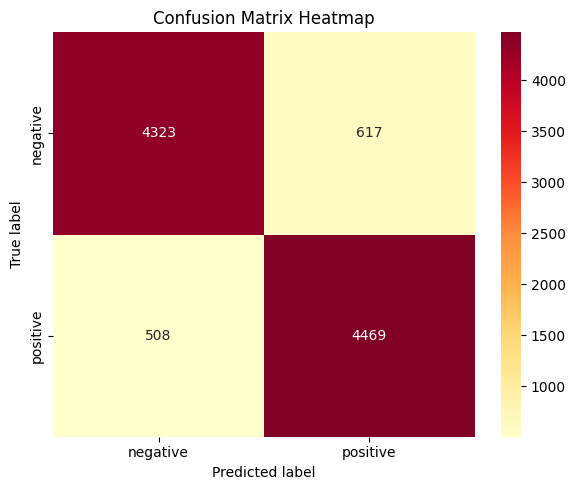

In [48]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['negative', 'positive']

plt.figure(figsize=(6,5))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd',
            xticklabels=labels, 
            yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

In [49]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")

AUC: 0.957


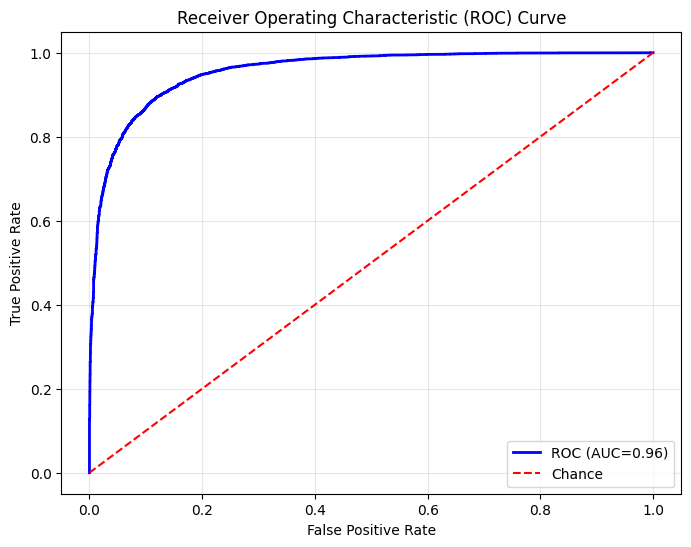

In [50]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f"ROC (AUC={roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

**Hyperparameter Listing**

In [51]:
# Print Logistic Regression hyperparameters
print("\nLogistic Regression hyperparameters:")
for name, val in clf.get_params().items():
    print(f"  {name}: {val}")


Logistic Regression hyperparameters:
  C: 1.0
  class_weight: None
  dual: False
  fit_intercept: True
  intercept_scaling: 1
  l1_ratio: None
  max_iter: 500
  multi_class: deprecated
  n_jobs: None
  penalty: l2
  random_state: None
  solver: liblinear
  tol: 0.0001
  verbose: 0
  warm_start: False


**Hyperparameter Tuning**

In [52]:
# Create a pipeline that encapsulates TF-IDF vectorization and classification
pipeline_LR = Pipeline([
    ('tfidf', vectorizer_LR),
    ('clf', clf)
])

# Define the hyperparameter grid to search
param_grid_LR = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],     # unigrams vs. unigrams + bigrams
    'tfidf__max_df': [0.90, 0.95],               # filter out very common tokens
    'tfidf__min_df': [3, 5],                     # filter out rare tokens
    'clf__C': [0.01, 0.1, 1, 10],                # regularization strength
    'clf__penalty': ['l2', 'l1'],                # regularization norm
    'clf__solver': ['liblinear']                 # solver compatible with l1/l2
}

# Initialize GridSearchCV
grid_search_LR = GridSearchCV(
    estimator=pipeline_LR,
    param_grid=param_grid_LR,
    scoring='f1',      # optimize for F1-score
    cv=5,              # 5-fold cross-validation on the training set
    n_jobs=-1,         # use all cores
    verbose=1
)

# Run grid search on the training data
grid_search_LR.fit(X_train, y_train)

# Print out the best hyperparameters and corresponding F1 score
print("Best CV F1-score:  {:.3f}".format(grid_search_LR.best_score_))
print("Best hyperparameters:")
for param, val in grid_search_LR.best_params_.items():
    print(f"  {param}: {val}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best CV F1-score:  0.900
Best hyperparameters:
  clf__C: 10
  clf__penalty: l2
  clf__solver: liblinear
  tfidf__max_df: 0.9
  tfidf__min_df: 3
  tfidf__ngram_range: (1, 2)


**Evaluation after Hyperparameter Tuning**

Average Cross-Validated Accuracy on Training Set: 0.899

Test-set Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.90      0.90      4940
    positive       0.90      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917

AUC: 0.965


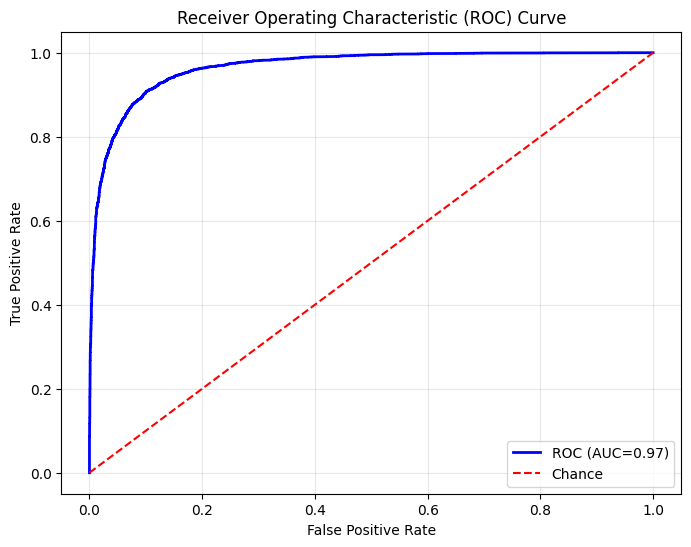

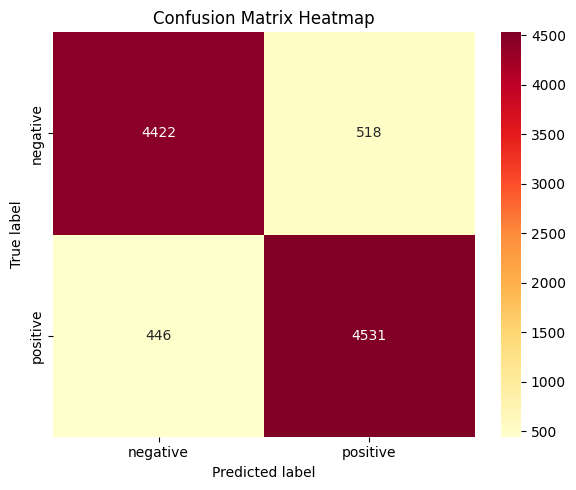

In [53]:
best_model = grid_search_LR.best_estimator_

# Calculate average accuracy with 5-fold cross-validation on the training data
avg_accuracy = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
print(f"Average Cross-Validated Accuracy on Training Set: {avg_accuracy:.3f}")

# Get predictions and probabilities from the best model
best_model = grid_search_LR.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print classification report
print("\nTest-set Classification Report:\n", 
      classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# AUC and ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Print AUC score
print(f"AUC: {roc_auc:.3f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f"ROC (AUC={roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['negative', 'positive']

# Plot heatmap for confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()

<h2>Multinomial Naïve Bayes Model</h2>

**TF-IDF Vectorization**

In [58]:
# TF–IDF vectorization
tfidf_NB = TfidfVectorizer(
    stop_words='english',   # drop common words
    max_df=0.95,            # ignore overly frequent tokens
    min_df=5                # ignore very rare tokens
)
X_train_tfidf_NB = tfidf_NB.fit_transform(X_train)
X_test_tfidf_NB  = tfidf_NB.transform(X_test)

**Naïve Bayes Model Training**

In [59]:
# Train Multinomial Naive Bayes
nb = MultinomialNB(alpha=1.0)   
nb.fit(X_train_tfidf_NB, y_train)

MultinomialNB()

**Initial Evaluation**

In [60]:
# Predict & report basic metrics
y_pred  = nb.predict(X_test_tfidf_NB)
y_score = nb.predict_proba(X_test_tfidf_NB)[:, 1]  # positive‐class probabilities

print("\n--- Classification Report Before Hyperparameter Tuning---\n")
print(classification_report(y_test, y_pred, target_names=['negative','positive'], digits= 4))
print(f"Overall accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Recall (positive):", f"{recall_score(y_test, y_pred):.4f}")
print("F1-score (positive):", f"{f1_score(y_test, y_pred):.4f}")


--- Classification Report Before Hyperparameter Tuning---

              precision    recall  f1-score   support

    negative     0.8452    0.8676    0.8563      4940
    positive     0.8650    0.8423    0.8535      4977

    accuracy                         0.8549      9917
   macro avg     0.8551    0.8549    0.8549      9917
weighted avg     0.8552    0.8549    0.8549      9917

Overall accuracy: 0.8549
Recall (positive): 0.8423
F1-score (positive): 0.8535


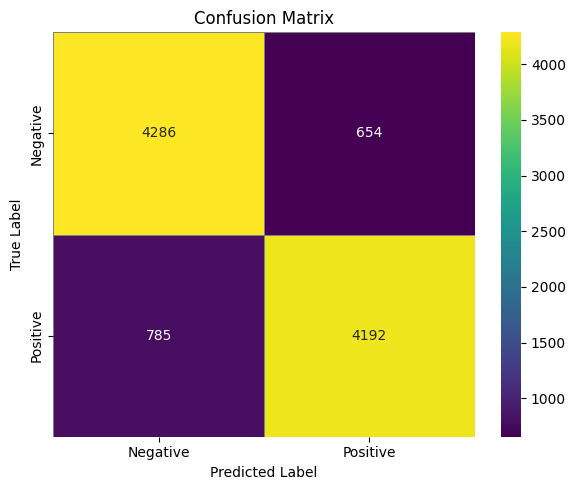

In [61]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='viridis', 
    cbar=True,
    xticklabels=labels,
    yticklabels=labels,
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


AUC = 0.9320


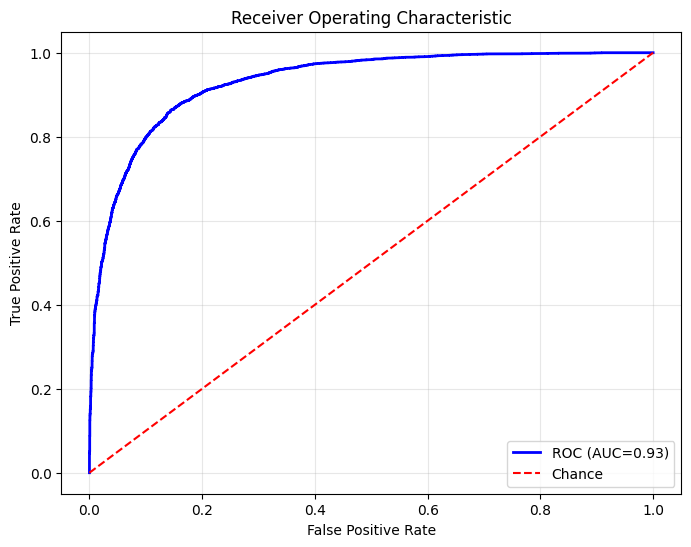

In [62]:
# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
auc_val     = roc_auc_score(y_test, y_score)
print(f"AUC = {auc_val:.4f}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f"ROC (AUC={auc_val:.2f})", color='blue')
plt.plot([0,1],[0,1], '--', color='red', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [63]:
# 5-Fold CV (F1-score)
cv = cross_validate(
    nb,
    X_train_tfidf_NB, y_train,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
print("CV F1 scores:", cv['test_score'])
print("Mean CV F1-score: {:.2f}".format(cv['test_score'].mean()))

CV F1 scores: [0.85479798 0.85316103 0.85352897 0.85902972 0.85558928]
Mean CV F1-score: 0.86


**Hyperparameter Listing**

In [64]:
# MultinomialNB hyperparameters
nb = MultinomialNB(
    alpha=1.0,        # Laplace smoothing constant
    force_alpha=True, # if False and alpha<1e-10, forces alpha→1e-10
    fit_prior=True,   # whether to learn class priors from data
    class_prior=None  # manually override class priors (None uses data)
)

print("\nMultinomialNB hyperparameters and defaults:")
for name, val in nb.get_params().items():
    print(f"  • {name}: {val}")


MultinomialNB hyperparameters and defaults:
  • alpha: 1.0
  • class_prior: None
  • fit_prior: True
  • force_alpha: True


**Hyperparameter Tuning**

In [65]:
# Hyperparameter Tuning with GridSearchCV
# Build a pipeline that applies TF–IDF then MultinomialNB
pipeline_NB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb',    MultinomialNB())
])

# Define the grid of hyperparameters to search
param_grid_NB = {
    'tfidf__min_df':     [5, 10],        # ignore tokens in fewer than 5 or 10 docs
    'tfidf__max_df':     [0.90, 0.95],   # ignore tokens in >90% or >95% of docs
    'tfidf__ngram_range':[ (1,1), (1,2)],# unigrams vs. uni+bi
    'nb__alpha':         [0.01, 0.1, 1.0, 2.0, 5.0],  # Laplace smoothing
    'nb__force_alpha':   [True, False],  # how strictly to apply alpha
    'nb__fit_prior':     [True, False]   # learn class priors or use uniform
    # note: 'nb__class_prior' can also be set manually if desired
}

# Configure GridSearchCV
grid_search_NB = GridSearchCV(
    estimator=pipeline_NB,
    param_grid=param_grid_NB,
    cv=5,             # 5-fold CV
    scoring='f1',     # optimize for F1-score
    n_jobs=-1,
    verbose=1
)

# Run the grid search on your raw training text & labels
grid_search_NB.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.01, 0.1, 1.0, 2.0, 5.0],
                         'nb__fit_prior': [True, False],
                         'nb__force_alpha': [True, False],
                         'tfidf__max_df': [0.9, 0.95], 'tfidf__min_df': [5, 10],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1', verbose=1)

**Evaluation after Hyperparameter Tuning**


=== Q3.2 Grid Search Results ===
Tested parameters: {'tfidf__min_df': [5, 10], 'tfidf__max_df': [0.9, 0.95], 'tfidf__ngram_range': [(1, 1), (1, 2)], 'nb__alpha': [0.01, 0.1, 1.0, 2.0, 5.0], 'nb__force_alpha': [True, False], 'nb__fit_prior': [True, False]}
Best parameters:   {'nb__alpha': 1.0, 'nb__fit_prior': False, 'nb__force_alpha': True, 'tfidf__max_df': 0.9, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}
Best CV F1-score: 0.8711

Test-set performance with best params:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      4940
    positive       0.87      0.87      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

Test-set AUC: 0.9441


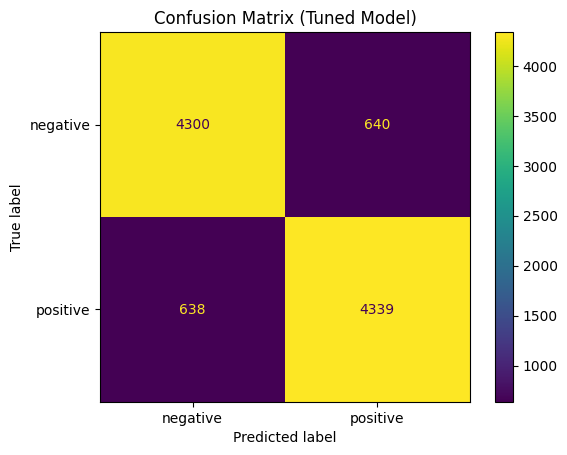

In [69]:
# Report the tested grid and best outcome
print("\n=== Q3.2 Grid Search Results ===")
print("Tested parameters:", param_grid_NB)
print("Best parameters:  ", grid_search_NB.best_params_)
print(f"Best CV F1-score: {grid_search_NB.best_score_:.4f}")

# Evaluate the best model on the held-out test set

best_model = grid_search_NB.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:,1]

print("\nTest-set performance with best params:")
print(classification_report(y_test, y_pred_best, target_names=['negative','positive']))
print("Test-set AUC:", f"{roc_auc_score(y_test, y_proba_best):.4f}")

# Confusion Matrix for the tuned model
cm   = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative','positive'])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Tuned Model)")
plt.show()

<h2>Neural Network: BiLSTM  Model</h2>

**SET SEED FOR REPRODUCIBILITY**

In [71]:
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

**Prepare Dataset**

In [72]:
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["sentiment"])

X = df["lemmatized_review"]
y = df["label"]

**TOKENIZE AND PAD**

In [73]:
vocab_size = 5000
max_length = 200

tokenizer_BiLSTM = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer_BiLSTM.fit_on_texts(X)
X_seq_BiLSTM = tokenizer_BiLSTM.texts_to_sequences(X)
X_pad_BiLSTM = pad_sequences(X_seq_BiLSTM, maxlen=max_length, padding="post")

**Split Dataset (With Tokenized and Padded Variable)**

In [74]:
X_train_BiLSTM, X_test_BiLSTM, y_train_BiLSTM, y_test_BiLSTM = train_test_split(
    X_pad_BiLSTM, y, test_size=0.2, stratify=y, random_state=SEED
)

print(f"Total dataset size: {df.shape[0]}")
print(f"Train size: {X_train_BiLSTM.shape[0]}")
print(f"Test size: {X_test_BiLSTM.shape[0]}")

Total dataset size: 49582
Train size: 39665
Test size: 9917


**BiLSTM  Model Building**

In [75]:
model_BiLSTM = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16),
    Bidirectional(LSTM(16, return_sequences=False)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_BiLSTM.build(input_shape=(None, max_length))
model_BiLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_BiLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 16)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,257 (329.13 KB)

 Trainable params: 84,257 (329.13 KB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [76]:
class_weights_BiLSTM = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_BiLSTM),
    y=y_train_BiLSTM
)
class_weights_BiLSTM = dict(enumerate(class_weights_BiLSTM))
early_stop_BiLSTM = EarlyStopping(monitor='loss', patience=2)

history = model_BiLSTM.fit(
    X_train_BiLSTM, y_train_BiLSTM,
    epochs=1,
    batch_size=16,
    callbacks=[early_stop_BiLSTM],
    shuffle=False,
    class_weight=class_weights_BiLSTM,
    verbose=1
)   

2480/2480 ━━━━━━━━━━━━━━━━━━━━ 62s 24ms/step - accuracy: 0.7190 - loss: 0.5318


**Initial Evaluation**

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      4940
    positive       0.83      0.89      0.86      4977

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

Accuracy: 0.8529797317737219
AUC: 0.9184900339130851


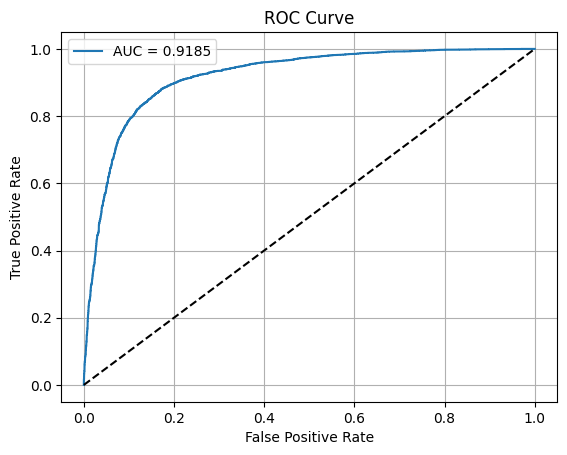

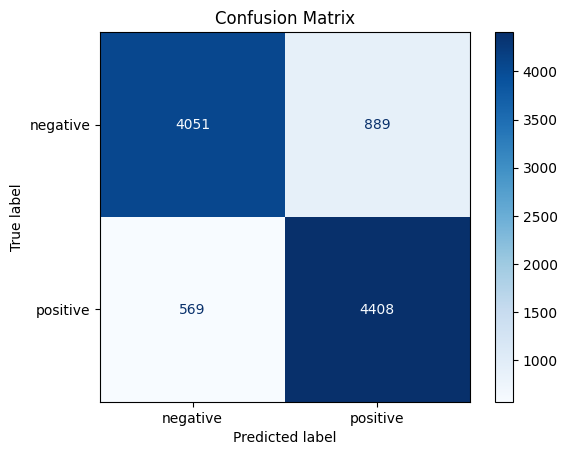

In [77]:
y_pred_prob_BiLSTM = model_BiLSTM.predict(X_test_BiLSTM)
y_pred_BiLSTM = (y_pred_prob_BiLSTM > 0.5).astype(int)

print(classification_report(y_test_BiLSTM, y_pred_BiLSTM, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test_BiLSTM, y_pred_BiLSTM))
print("AUC:", roc_auc_score(y_test_BiLSTM, y_pred_prob_BiLSTM))

fpr, tpr, _ = roc_curve(y_test_BiLSTM, y_pred_prob_BiLSTM)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_BiLSTM, y_pred_prob_BiLSTM):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test_BiLSTM, y_pred_BiLSTM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


**SAVE MODEL & TOKENIZER**

In [78]:
model_BiLSTM.save("lstm_model.keras")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer_BiLSTM, f)

**Hyperparameter Listing**

In [80]:
# embedding_dims = [16, 32, 64, 128]
# lstm_units = [16, 32, 64, 128]
# dropouts = [0.1, 0.3, 0.5]
# batch_sizes = [16, 32, 64, 128]
# epochs_list = [1, 3, 5]

grid_params_BiLSTM = [
    {'embedding_dim': 16, 'lstm_units': 16, 'dropout_rate': 0.1, 'batch_size': 16,  'epochs': 1},
    {'embedding_dim': 32, 'lstm_units': 32, 'dropout_rate': 0.1, 'batch_size': 32,  'epochs': 3},
    {'embedding_dim': 64, 'lstm_units': 64, 'dropout_rate': 0.1, 'batch_size': 64,  'epochs': 5},
    {'embedding_dim': 128, 'lstm_units': 128, 'dropout_rate': 0.1, 'batch_size': 128, 'epochs': 5},
    
    {'embedding_dim': 16, 'lstm_units': 32, 'dropout_rate': 0.3, 'batch_size': 32,  'epochs': 3},
    {'embedding_dim': 32, 'lstm_units': 64, 'dropout_rate': 0.3, 'batch_size': 64,  'epochs': 3},
    {'embedding_dim': 64, 'lstm_units': 128, 'dropout_rate': 0.3, 'batch_size': 128, 'epochs': 3},
    {'embedding_dim': 128, 'lstm_units': 64, 'dropout_rate': 0.3, 'batch_size': 32,  'epochs': 1},
    
    {'embedding_dim': 32, 'lstm_units': 16, 'dropout_rate': 0.5, 'batch_size': 16,  'epochs': 1},
    {'embedding_dim': 64, 'lstm_units': 32, 'dropout_rate': 0.5, 'batch_size': 32,  'epochs': 1},
    {'embedding_dim': 128, 'lstm_units': 32, 'dropout_rate': 0.5, 'batch_size': 64,  'epochs': 3},
    {'embedding_dim': 128, 'lstm_units': 128, 'dropout_rate': 0.5, 'batch_size': 128, 'epochs': 1},
    
    {'embedding_dim': 16, 'lstm_units': 128, 'dropout_rate': 0.1, 'batch_size': 64,  'epochs': 1},
    {'embedding_dim': 32, 'lstm_units': 16, 'dropout_rate': 0.3, 'batch_size': 128, 'epochs': 3},
    {'embedding_dim': 64, 'lstm_units': 16, 'dropout_rate': 0.5, 'batch_size': 128, 'epochs': 5},
    
    {'embedding_dim': 128, 'lstm_units': 16, 'dropout_rate': 0.3, 'batch_size': 16,  'epochs': 5},
    {'embedding_dim': 64, 'lstm_units': 64, 'dropout_rate': 0.5, 'batch_size': 16,  'epochs': 3},
    {'embedding_dim': 32, 'lstm_units': 128, 'dropout_rate': 0.1, 'batch_size': 64,  'epochs': 5},
    {'embedding_dim': 16, 'lstm_units': 64, 'dropout_rate': 0.3, 'batch_size': 32,  'epochs': 5},
    {'embedding_dim': 64, 'lstm_units': 128, 'dropout_rate': 0.5, 'batch_size': 64,  'epochs': 1},
]

**Hyperparameter Tuning**

In [82]:
def build_model_BiLSTM(params):
    model = Sequential()
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=params['embedding_dim'],
    ))
    model.add(Bidirectional(LSTM(
        params['lstm_units'],
        return_sequences=False
    )))
    model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

results_BiLSTM = []
best_model_BiLSTM = None
best_f1_BiLSTM = 0
best_config_BiLSTM = None

for i, config in enumerate(grid_params_BiLSTM):
    print(f"\nTrial {i+1} / {len(grid_params_BiLSTM)} with config: {config}")
    model_BiLSTM = build_model_BiLSTM(config)

    model_BiLSTM.fit(
        X_train_BiLSTM, y_train_BiLSTM,
        epochs=config['epochs'],
        batch_size=config['batch_size'],
        callbacks=[early_stop_BiLSTM],
        shuffle=False,
        class_weight=class_weights_BiLSTM,
        verbose=0
    )

    y_val_pred_prob_BiLSTM = model_BiLSTM.predict(X_test_BiLSTM)
    y_val_pred_BiLSTM = (y_val_pred_prob_BiLSTM > 0.5).astype(int)

    f1_BiLSTM = f1_score(y_test_BiLSTM, y_val_pred_BiLSTM)
    print(f"Validation F1-score: {f1_BiLSTM:.4f}")

    trial_result_BiLSTM = {
        'embedding_dim': config['embedding_dim'],
        'lstm_units': config['lstm_units'],
        'dropout_rate': config['dropout_rate'],
        'batch_size': config['batch_size'],
        'epochs': config['epochs'],
        'val_f1_score': f1_BiLSTM
    }
    results_BiLSTM.append(trial_result_BiLSTM)

    if f1_BiLSTM > best_f1_BiLSTM:
        best_f1_BiLSTM = f1_BiLSTM
        best_model_BiLSTM = model_BiLSTM
        best_config_BiLSTM = config

# Save results
results_df_BiLSTM = pd.DataFrame(results_BiLSTM)
results_df_BiLSTM.to_csv("grid_search_f1_results.csv", index=False)
print("\nAll trial results saved to 'grid_search_f1_results.csv'")


Trial 1 / 20 with config: {'embedding_dim': 16, 'lstm_units': 16, 'dropout_rate': 0.1, 'batch_size': 16, 'epochs': 1}
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Validation F1-score: 0.8661

Trial 2 / 20 with config: {'embedding_dim': 32, 'lstm_units': 32, 'dropout_rate': 0.1, 'batch_size': 32, 'epochs': 3}
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Validation F1-score: 0.8645

Trial 3 / 20 with config: {'embedding_dim': 64, 'lstm_units': 64, 'dropout_rate': 0.1, 'batch_size': 64, 'epochs': 5}
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Validation F1-score: 0.8754

Trial 4 / 20 with config: {'embedding_dim': 128, 'lstm_units': 128, 'dropout_rate': 0.1, 'batch_size': 128, 'epochs': 5}
310/310 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
Validation F1-score: 0.8639

Trial 5 / 20 with config: {'embedding_dim': 16, 'lstm_units': 32, 'dropout_rate': 0.3, 'batch_size': 32, 'epochs': 3}
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Validation F1-score: 0.8735

Trial 6 / 20 with config: {'embedding_dim': 32, 'lstm_

**Best Model**

In [83]:
print("\nBest hyperparameters:")
for k, v in best_config_BiLSTM.items():
    print(f"{k}: {v}")

y_pred_prob_BiLSTM = best_model_BiLSTM.predict(X_test_BiLSTM)
y_pred_BiLSTM = (y_pred_prob_BiLSTM > 0.5).astype(int)


Best hyperparameters:
embedding_dim: 32
lstm_units: 16
dropout_rate: 0.3
batch_size: 128
epochs: 3
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


**Evaluation After Hyperparameter Tuning**

              precision    recall  f1-score   support

    negative       0.90      0.86      0.88      4940
    positive       0.86      0.90      0.88      4977

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

Accuracy: 0.8793990117979228
AUC: 0.9432721287151666


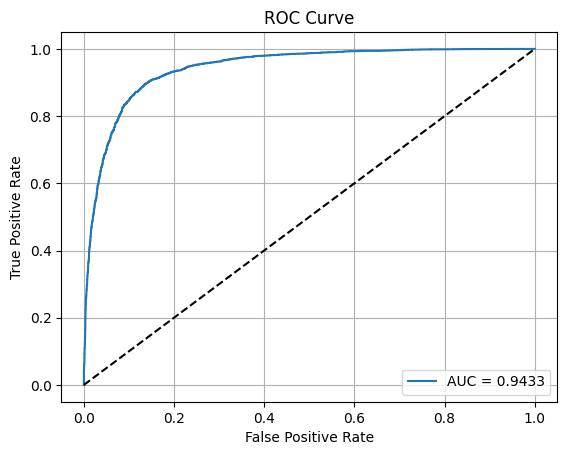

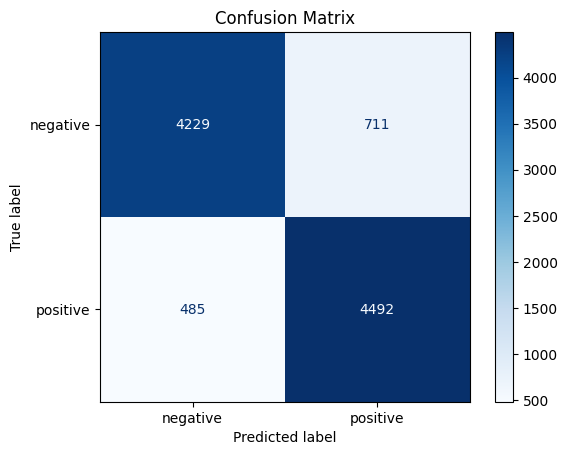

In [84]:
print(classification_report(y_test_BiLSTM, y_pred_BiLSTM, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test_BiLSTM, y_pred_BiLSTM))
print("AUC:", roc_auc_score(y_test_BiLSTM, y_pred_prob_BiLSTM))

fpr, tpr, _ = roc_curve(y_test_BiLSTM, y_pred_prob_BiLSTM)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_BiLSTM, y_pred_prob_BiLSTM):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test_BiLSTM, y_pred_BiLSTM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

<h2>LinearSVC Model</h2>

**TF-IDF Vectorization**

In [85]:
tfidf_SVM = TfidfVectorizer(
    stop_words= 'english',      #drop common words
    max_df=0.95,                #ignore overly frequent tokens
    min_df=5                    #ignore very rare tokens
)
X_train_tfidf   = tfidf_SVM.fit_transform(X_train)
X_test_tfidf    = tfidf_SVM.transform(X_test)

**LinearSVC Model Building**

In [93]:
# Initialize the Linear SVC
svm_model = LinearSVC()

# Wrap with CalibratedClassifierCV to get probabilities for AUC/ROC
svm_model_calibrated = CalibratedClassifierCV(svm_model)

# Train the model
svm_model_calibrated.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = svm_model_calibrated.predict(X_test_tfidf)
y_prob = svm_model_calibrated.predict_proba(X_test_tfidf)[:, 1]  # Probabilities for ROC Curve

**Initial Evaluation**

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4940
    positive       0.88      0.89      0.89      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

Confusion Matrix:
[[4344  596]
 [ 544 4433]]


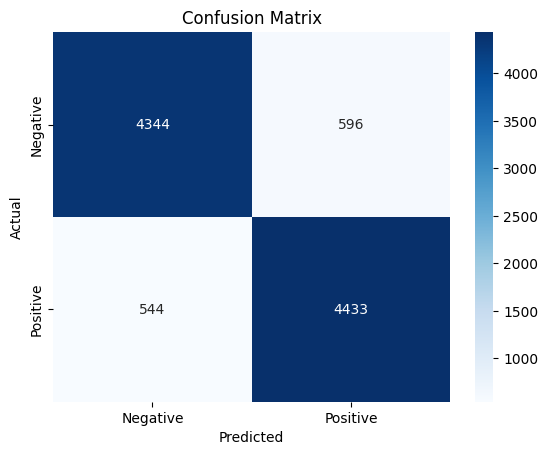

AUC Score: 0.954978366070971


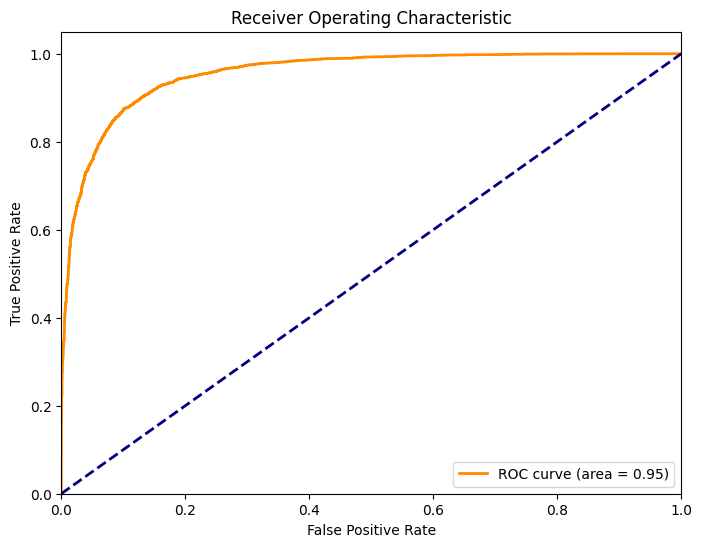

In [94]:
# Classification Report
print("Classification Report:\n", classification_report(
    y_test, 
    y_pred, 
    target_names=['negative', 'positive']
    ))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**Cross Validation**

In [95]:
# Cross-validation (F1 score)
cv = cross_val_score(svm_model_calibrated, X_train_tfidf, y_train, cv=5, scoring='f1', n_jobs=-1)

print("Cross-validation F1 Score:", cv)
print("Mean CV F1-score: {:.2f}".format(cv.mean()))

Cross-validation F1 Score: [0.88598131 0.87782919 0.88634098 0.88736777 0.88104738]
Mean CV F1-score: 0.88


**Hyperparameter Listing**

In [96]:
# LinearSVC hyperparameters
svm_model = LinearSVC(
    C=1.0,                  # Regularization strength
    class_weight=None,      # Used to handle imbalanced dataset (None means no weighting)
    dual=True,              # Dual or primal formulation (dual=True for high-dimensional feature spaces)
    fit_intercept=True,     # Whether to calculate the intercept (bias term)
    intercept_scaling=1,    # Scaling of the intercept (bias term), important for optimization in some solvers
    loss='squared_hinge',   # Loss function type, 'squared_hinge' is used for support vector classification
    max_iter=1000,          # Maximum number of iterations for convergence
    multi_class='ovr',      # Handling for multi-class problems (one-vs-rest strategy)
    penalty='l2',           # Type of regularization used (l2 penalty prevents overfitting)
    random_state=None,      # Controls the randomness of the algorithm for reproducibility of results
    tol=1e-4,               # Tolerance for stopping criteria, defines convergence precision
    verbose=1               # Controls how much information is printed during training (1 = print progress)
)

print("\nLinearSVM hyperparameters and defaults: ")
for name, val in svm_model.get_params().items():
    print(f"{name}: {val}")


LinearSVM hyperparameters and defaults: 
C: 1.0
class_weight: None
dual: True
fit_intercept: True
intercept_scaling: 1
loss: squared_hinge
max_iter: 1000
multi_class: ovr
penalty: l2
random_state: None
tol: 0.0001
verbose: 1


**Hyperparameter Tuning**

In [97]:
# Create base SVC wrapped with CalibratedClassifierCV for predict_proba
base_svc = LinearSVC()
calibrated_svc = CalibratedClassifierCV(base_svc)

# Create pipeline
pipeline_SVC = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('svc', CalibratedClassifierCV(LinearSVC()))
])

# Define the parameter grid for both TF-IDF and LinearSVC
param_grid_SVC = {
    # TF-IDF Parameters
    'tfidf__min_df': [5,10],                    # Min doc freq for feature inclusion
    'tfidf__max_df': [0.90, 0.95],              # Max doc freq to ignore overly frequent words
    'tfidf__ngram_range': [(1, 1), (1, 2)],     # Unigrams and bigrams

    # LinearSVC Parameters        
    'svc__estimator__C': [0.1, 1, 10],                      # Regularization strength
    'svc__estimator__max_iter': [1000, 1500],               # Number of iterations
    'svc__estimator__tol': [1e-4, 1e-3],                    # Tolerance for stopping criteria
    'svc__estimator__loss': ['hinge', 'squared_hinge'],     # Loss function type
    'svc__estimator__dual': [True, False]                   # Dual or primal formulation
}

In [98]:
# Set up GridSearchCV with 5-fold cross-validation and scoring by F1 score
grid_search = GridSearchCV(
    estimator=pipeline_SVC,
    param_grid=param_grid_SVC,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=3
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score from Grid Search:", grid_search.best_score_)

# Get the best model after tuning
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Get prediction probabilities for ROC/AUC 
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy with best model:", accuracy)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-p

Best Hyperparameters: {'svc__estimator__C': 1, 'svc__estimator__dual': True, 'svc__estimator__loss': 'hinge', 'svc__estimator__max_iter': 1000, 'svc__estimator__tol': 0.0001, 'tfidf__max_df': 0.9, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 2)}
Best F1 Score from Grid Search: 0.8945809516622016
Accuracy with best model: 0.8948270646364828


**Evaluation after Hyperparameter Tuning**


 Report with best parameters

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4940
    positive       0.89      0.90      0.90      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

Confusion Matrix:
[[4398  542]
 [ 501 4476]]


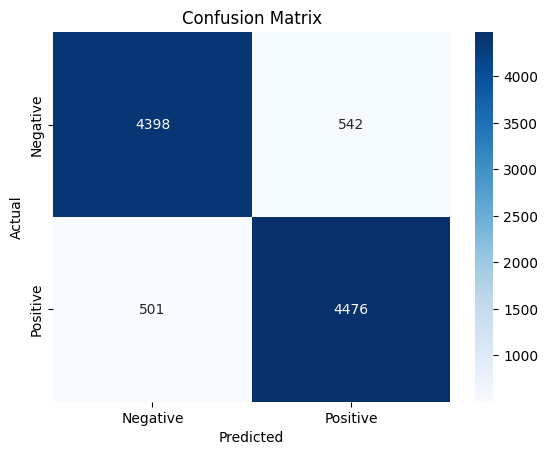

AUC Score: 0.9612953594632474


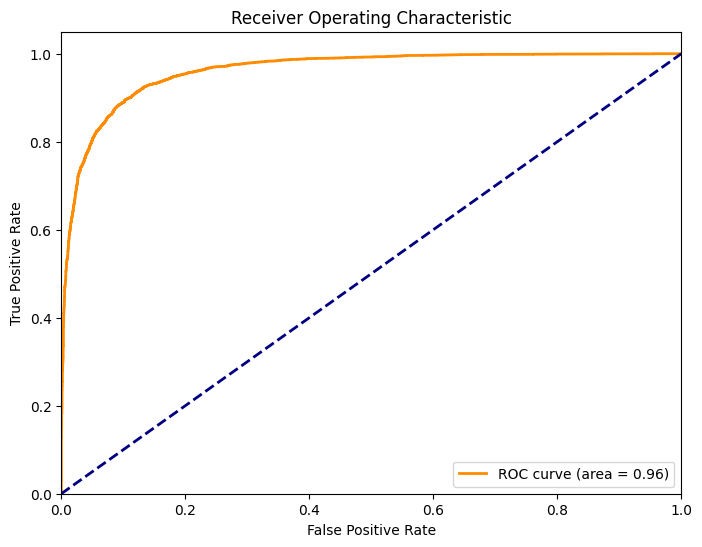

In [99]:
# Classification Report
print ("\n Report with best parameters")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, target_names=['negative', 'positive']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)

# Plotting Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()